In [1]:
#Importing Health Screening Data for description and preprocessing
import pandas as pd
import csv

#Reading the csv file
csv_file_path = r'C:\Users\y0s97\OneDrive - University of Keele\Documents\Health Screening Data.csv'  
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) 
    
# Read Health Screening Data into pandas DataFrame
df = pd.read_csv(csv_file_path)

# Getting the list of column names
column_names = df.columns.tolist()

# Print the list of column names
print(column_names)

['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'AgeinYr', 'BMI', 'BMICat', 'AgeGroup']


In [2]:
#To get the understanding of the columns
print(df.describe())



         Unnamed: 0            id           age        gender        height  \
count  69960.000000  69960.000000  69960.000000  69960.000000  69960.000000   
mean   34997.986664  49970.256775  19469.038265      1.349600    164.359105   
std    20208.167635  28852.390899   2467.203943      0.476847      8.210541   
min        0.000000      0.000000  10798.000000      1.000000     55.000000   
25%    17496.750000  25001.500000  17665.000000      1.000000    159.000000   
50%    34994.500000  49994.000000  19703.000000      1.000000    165.000000   
75%    52500.250000  74890.250000  21327.000000      2.000000    170.000000   
max    69999.000000  99999.000000  23713.000000      2.000000    250.000000   

             weight         ap_hi         ap_lo   cholesterol          gluc  \
count  69960.000000  69960.000000  69960.000000  69960.000000  69960.000000   
mean      74.208266    126.681089     96.647642      1.366852      1.226487   
std       14.396277     18.205557    188.523437    

In [3]:
#To know the types of the attributes
print(df.dtypes)

Unnamed: 0       int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
AgeinYr          int64
BMI            float64
BMICat          object
AgeGroup        object
dtype: object


In [4]:
#Preprocessing steps
#To check for null values 
print(df.isnull().sum())

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
AgeinYr        0
BMI            0
BMICat         0
AgeGroup       0
dtype: int64


In [5]:
#To check for missing values
missing_values = ["n/a", "na", "--", ' ', '?']
df.replace(missing_values, pd.NA, inplace=True)

# Count missing values
missing_count = df.isna().sum().sum()
print("Total missing values:", missing_count)


Total missing values: 0


In [6]:
#To check for duplicates
duplicates = df[df.duplicated()]

# Check if there are any duplicates
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found.")
    print(duplicates)

No duplicates found.


In [7]:
#since there are no missing values and duplicates
#further preprocessing will be carried out
#removing outliers (1)

import numpy as np

# Function for removing outliers using MAD method
def remove_outliers_mad(df, columns, threshold=3.5):
    for column in columns:
        median = df[column].median()
        mad = np.median(np.abs(df[column] - median))
        upper_bound = median + threshold * mad
        lower_bound = median - threshold * mad
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Choose numerical columns containing potential outliers
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Removing the outliers using MAD method
df_cleaned_mad = remove_outliers_mad(df, numerical_columns)

# Print the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers (MAD method):", df.shape)
print("Shape after removing outliers (MAD method):", df_cleaned_mad.shape)



Shape before removing outliers (MAD method): (69960, 18)
Shape after removing outliers (MAD method): (32267, 18)


In [8]:
#further preprocessing
#scaling of numercial values through standardization(2)

from sklearn.preprocessing import StandardScaler

# Represent the StandardScaler
scaler = StandardScaler()

# Defining numerical columns to be scaled
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Apply standardization to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Printing the scaled numerical columns
print("Scaled Numerical Columns:")
print(df[numerical_columns].head())

# Printing the mean and standard deviation of the scaled numerical columns
print("\nMean of Scaled Numerical Columns:")
print(df[numerical_columns].mean())
print("\nStandard Deviation of Scaled Numerical Columns:")
print(df[numerical_columns].std())


Scaled Numerical Columns:
        age    height    weight     ap_hi     ap_lo
0 -0.436140  0.443445 -0.848022 -0.916270 -0.088306
1  0.307622 -1.018102  0.749625  0.731590 -0.035262
2 -0.248071  0.078058 -0.709096  0.182303 -0.141350
3 -0.748236  0.565240  0.541236  1.280877  0.017782
4 -0.808629 -1.018102 -1.264799 -1.465557 -0.194394

Mean of Scaled Numerical Columns:
age       3.054034e-16
height    2.023158e-16
weight    1.137518e-17
ap_hi    -1.085721e-16
ap_lo    -2.295350e-17
dtype: float64

Standard Deviation of Scaled Numerical Columns:
age       1.000007
height    1.000007
weight    1.000007
ap_hi     1.000007
ap_lo     1.000007
dtype: float64


In [9]:
#further preprocessing
# ordinal encoding of BMICat
from sklearn.preprocessing import OrdinalEncoder

# Defining the ordinal categories in the desired order
bmi_categories = ['Under Weight', 'Normal', 'Over Weight', 'Obese']

# Initializing the OrdinalEncoder with the corrected categories
encoder = OrdinalEncoder(categories=[bmi_categories])

#Now, Reshape the BMICat column to a 2D array
bmi_cat_encoded = df['BMICat'].values.reshape(-1, 1)

# Fit and transform the BMICat column using ordinal encoding
df['BMICat_encoded'] = encoder.fit_transform(bmi_cat_encoded)

# Print the first few rows to verify the encoding
print(df[['BMICat', 'BMICat_encoded']].head())


        BMICat  BMICat_encoded
0       Normal             1.0
1        Obese             3.0
2       Normal             1.0
3  Over Weight             2.0
4       Normal             1.0


In [10]:
# Saving the preprocessed file

# Specify the file path to save the preprocessed data
file_path = r'C:\Users\y0s97\OneDrive - University of Keele\Documents\Health Screening preprocessed_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print("Preprocessed data saved successfully")


Preprocessed data saved successfully


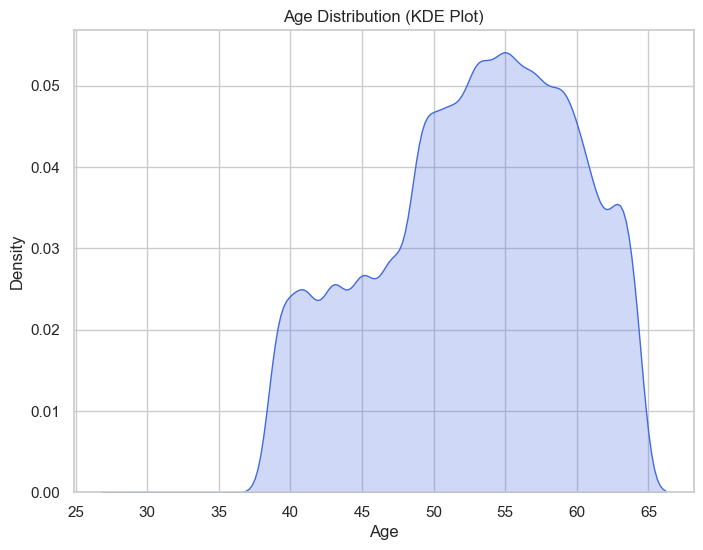

In [11]:
#Now to Visualisation
#Visualisation 1: Understanding Age Distribution using KDE Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Creating a KDE plot for age distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['AgeinYr'], fill=True, color='royalblue')
plt.title('Age Distribution (KDE Plot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



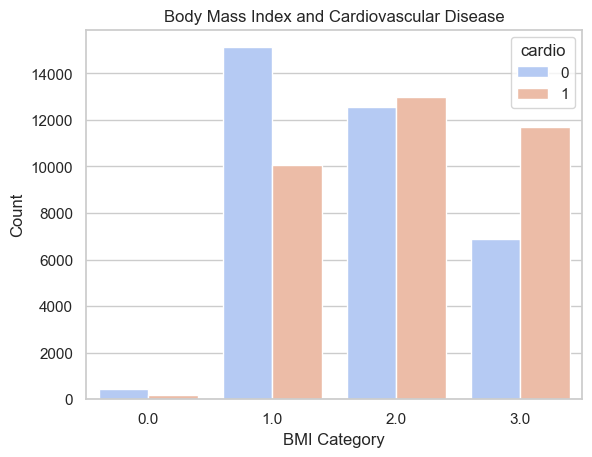

In [12]:
#Visualisation 2: Count plot of Body Mass Index Category and presence of cardiovascular disease

import seaborn as sns
import matplotlib.pyplot as plt
#creating countplot for BMI showing cardiovascular disease
sns.countplot(x='BMICat_encoded', hue='cardio', data=df, palette='coolwarm')
plt.title('Body Mass Index and Cardiovascular Disease')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


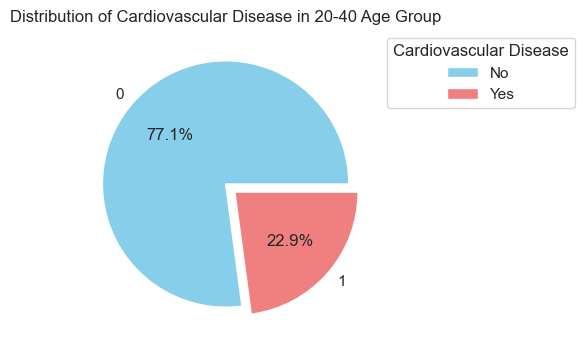

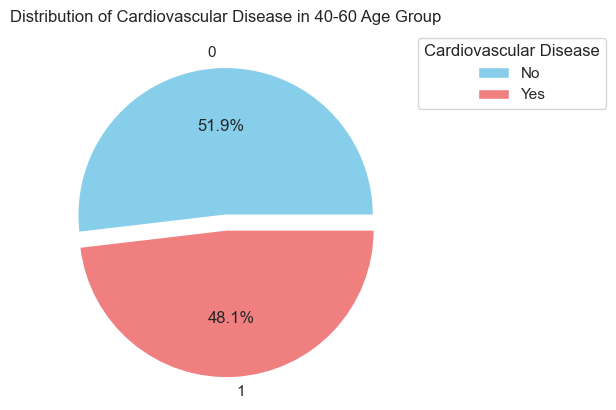

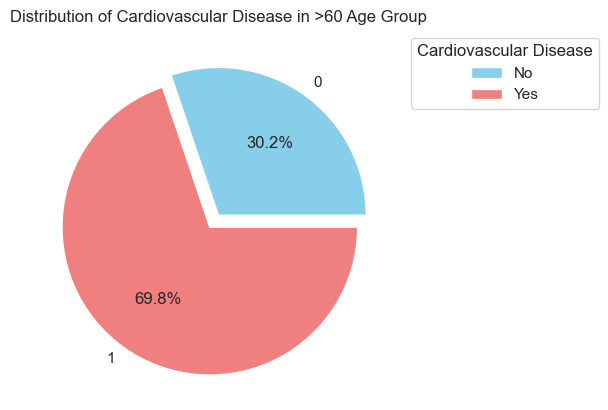

In [13]:
#Visualisation 3: Pie Chart to show the cardiovascular disease among the Age Groups

import matplotlib.pyplot as plt

# Lets count the frequency of cardiovascular disease (cardio) in each age group
cardio_counts = df.groupby('AgeGroup')['cardio'].value_counts().unstack()

# Plotting a pie chart for each age group with a smaller figure size
plt.figure(figsize=(6, 4)) 
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  
for age_group in cardio_counts.index:
    plt.pie(cardio_counts.loc[age_group], labels=cardio_counts.columns, autopct='%1.1f%%', colors=colors, explode=explode)
    plt.title(f'Distribution of Cardiovascular Disease in {age_group} Age Group')
    plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
    plt.show()


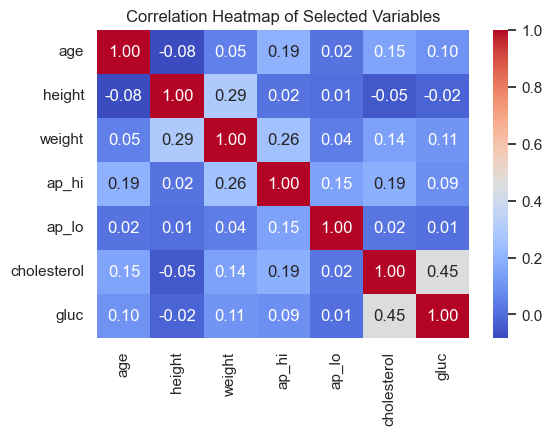

In [14]:
#Visualisation 4: The Correlation Heatmap of Selected Variables 
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables for the correlation heatmap
selected_variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

# To Calculate the correlation matrix
correlation_matrix = df[selected_variables].corr()

# Creating the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


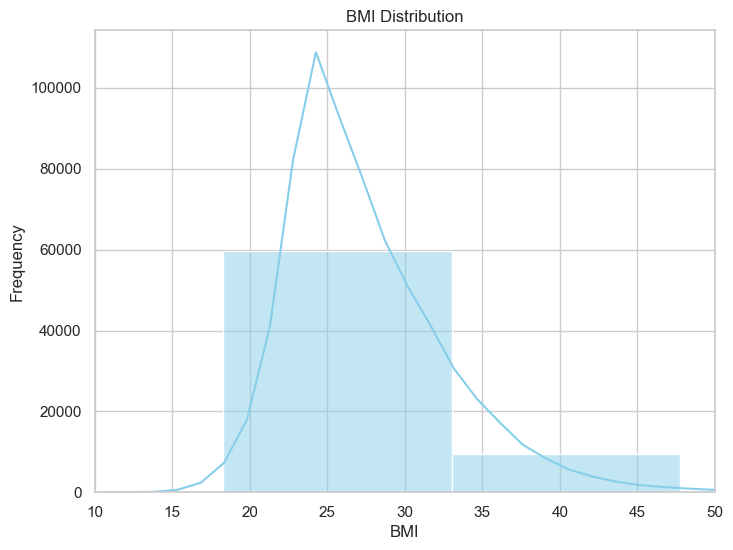

In [15]:
#Visualisation 5: Body Mass Index (BMI)(Histogram)
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.xlim(10, 50)
plt.show()


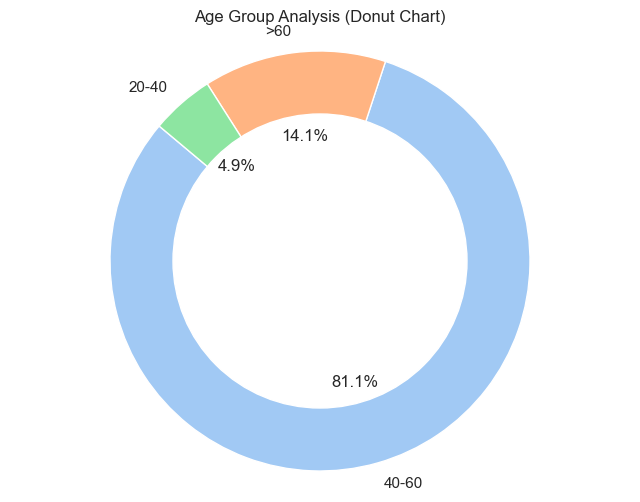

In [16]:
#Visualisation 6: Age Group Analysis (Donut Chart)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Calculate the values for the donut chart
age_group_counts = df['AgeGroup'].value_counts()
labels = age_group_counts.index
sizes = age_group_counts.values
colors = sns.color_palette('pastel')

# Creating the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Age Group Analysis (Donut Chart)")
plt.axis('equal')
plt.show()


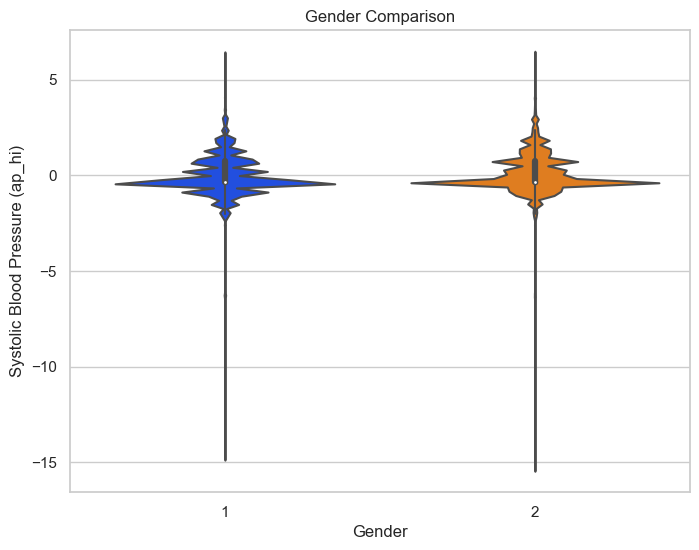

In [17]:
#Visualisation 7: Gender Comparison (Violin plots)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='gender', y='ap_hi', palette='bright')
plt.title("Gender Comparison")
plt.xlabel("Gender")
plt.ylabel("Systolic Blood Pressure (ap_hi)")
plt.show()

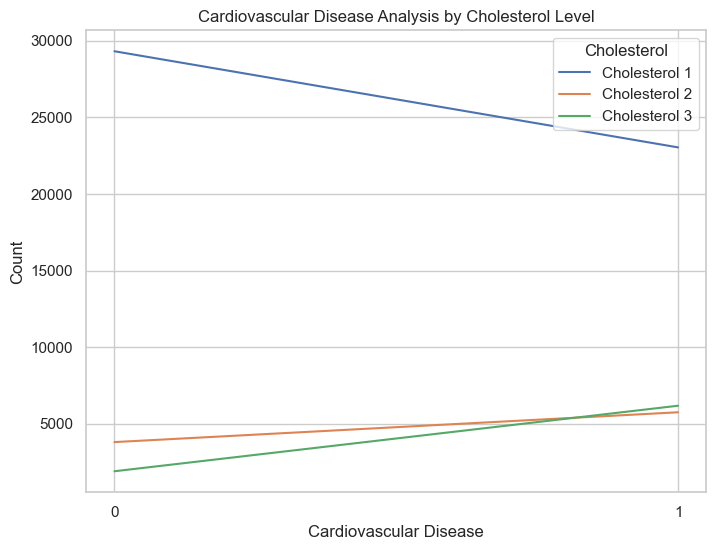

In [18]:
#Visualisation 8: Cardiovascular Disease (Line chart)
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of cardiovascular disease (cardio) in each cholesterol level
cardio_counts = df.groupby('cholesterol')['cardio'].value_counts().unstack()

# Plot lines for each cholesterol level
plt.figure(figsize=(8, 6))
for cholesterol_level in cardio_counts.index:
    plt.plot(cardio_counts.columns, cardio_counts.loc[cholesterol_level], label=f'Cholesterol {cholesterol_level}')

plt.title("Cardiovascular Disease Analysis by Cholesterol Level")
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Count")
plt.xticks(cardio_counts.columns)
plt.legend(title='Cholesterol', loc='upper right')
plt.grid(True)
plt.show()


In [21]:
#Big data analysis technique- pyspark

from pyspark.sql import SparkSession
from pyspark.sql.functions import count, col
 
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Cholesterol Gender Count") \
    .getOrCreate()
 
df = spark.read.csv(r'C:\Users\y0s97\OneDrive - University of Keele\Documents\Health Screening Data.csv', header=True, inferSchema=True)
 
# Count the number of males and females for each cholesterol level
gender_count = df.groupBy('cholesterol').pivot('gender').agg(count(col('gender')))
 
gender_count.show()

+-----------+-----+-----+
|cholesterol|    1|    2|
+-----------+-----+-----+
|          1|33551|18807|
|          3| 5555| 2508|
|          2| 6396| 3143|
+-----------+-----+-----+

